# WeatherPy
----

#### Trends Observed
* The first notable observation from the weatherpy analysis is the lack of direct relationship between cloudiness, humidity and windspeed. From the plotted graphs and data it is clear that they vary from location to location and further hemisphere as compared with the latitudecordinates.

* the southern hemisphere show a positive relation when it comes to humidity as this can be attributed to the increase number of cities with the higher level of humidity.On the other hand the northen hemisphere has  a significant difference in the total number of cities within the data frame which might result in a false positive conclution on the true relationship when both are compared.

* For Vacationpy analysis the humidity values seem high across the world currently, represented by the numerous red-colored regions on the heatmap representing maximum or near-maximum humidity for the areas shown. On this project  a zoomed visualion of cities within united states and brazil(attached images), shows values that seem especially high and continuous near coasts and some large bodies of water, like rivers or lakes, as compared to deeply inland areas of the continents.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Get Weather Data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()
print(requests.get(query_url + city))

<Response [200]>


In [4]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []



In [5]:
##Include a print log of each city as it's being processed (with the city number and city name).
# Processing Record Counter Starting a 1
processing_record = 1

# Print Starting Log Statement
print(f"---------", "Beginning Data Retrieval", "------------------")
#print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(city_record)
        print(f"Processing Record {processing_record} | {city_record}")
           # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"------------", "Data Retrieval Complete",  "--------")
#print(f"-------------------------------")
        

--------- Beginning Data Retrieval ------------------
Pathein
Processing Record 1 | Pathein
Concepción del Uruguay
Processing Record 2 | Concepción del Uruguay
Qaanaaq
Processing Record 3 | Qaanaaq
Port Alfred
Processing Record 4 | Port Alfred
Snezhnogorsk
Processing Record 5 | Snezhnogorsk
Avarua
Processing Record 6 | Avarua
Cape Town
Processing Record 7 | Cape Town
Yaan
Processing Record 8 | Yaan
Hobart
Processing Record 9 | Hobart
Albany
Processing Record 10 | Albany
Lebu
Processing Record 11 | Lebu
Palana
Processing Record 12 | Palana
Raymond
Processing Record 13 | Raymond
Lüderitz
Processing Record 14 | Lüderitz
Harar
Processing Record 15 | Harar
Touba
Processing Record 16 | Touba
Pangnirtung
Processing Record 17 | Pangnirtung
Salinas
Processing Record 18 | Salinas
Hermanus
Processing Record 19 | Hermanus
Upernavik
Processing Record 20 | Upernavik
Goundi
Processing Record 21 | Goundi
Ushuaia
Processing Record 22 | Ushuaia
Saint Anthony
Processing Record 23 | Saint Anthony
Tongchua

City not found. Skipping...
Norman Wells
Processing Record 180 | Norman Wells
Mankāpur
Processing Record 181 | Mankāpur
Erzin
Processing Record 182 | Erzin
Sitka
Processing Record 183 | Sitka
Torbay
Processing Record 184 | Torbay
Genhe
Processing Record 185 | Genhe
Saint-Augustin
Processing Record 186 | Saint-Augustin
Anori
Processing Record 187 | Anori
Geraldton
Processing Record 188 | Geraldton
Najrān
Processing Record 189 | Najrān
Tautira
Processing Record 190 | Tautira
Lata
Processing Record 191 | Lata
Upata
Processing Record 192 | Upata
Port Hardy
Processing Record 193 | Port Hardy
Srednekolymsk
Processing Record 194 | Srednekolymsk
Alice Springs
Processing Record 195 | Alice Springs
Florence
Processing Record 196 | Florence
Conceição do Araguaia
Processing Record 197 | Conceição do Araguaia
Sidrolândia
Processing Record 198 | Sidrolândia
Amahai
Processing Record 199 | Amahai
Khuzhir
Processing Record 200 | Khuzhir
Yantai
Processing Record 201 | Yantai
City not found. Skipping...


Sabha
Processing Record 362 | Sabha
Smidovich
Processing Record 363 | Smidovich
Talara
Processing Record 364 | Talara
Gravelbourg
Processing Record 365 | Gravelbourg
Baracoa
Processing Record 366 | Baracoa
Kangaatsiaq
Processing Record 367 | Kangaatsiaq
Kamenka
Processing Record 368 | Kamenka
Boa Vista
Processing Record 369 | Boa Vista
Balaka
Processing Record 370 | Balaka
Grindavik
Processing Record 371 | Grindavik
Kalbay
Processing Record 372 | Kalbay
Redlands
Processing Record 373 | Redlands
Hasaki
Processing Record 374 | Hasaki
Roebourne
Processing Record 375 | Roebourne
Praia da Vitória
Processing Record 376 | Praia da Vitória
Schwedt
Processing Record 377 | Schwedt
Udachny
Processing Record 378 | Udachny
Bud
Processing Record 379 | Bud
Angoram
Processing Record 380 | Angoram
Wanning
Processing Record 381 | Wanning
Lyuban'
Processing Record 382 | Lyuban'
Bāneh
Processing Record 383 | Bāneh
Bol
Processing Record 384 | Bol
Saint Paul Harbor
Processing Record 385 | Saint Paul Harbor


Collierville
Processing Record 545 | Collierville
Kalianget
Processing Record 546 | Kalianget
Airai
Processing Record 547 | Airai
Camacha
Processing Record 548 | Camacha
Jalu
Processing Record 549 | Jalu
Kota Kinabalu
Processing Record 550 | Kota Kinabalu
Biscarrosse
Processing Record 551 | Biscarrosse
City not found. Skipping...
Karratha
Processing Record 552 | Karratha
Burns Lake
Processing Record 553 | Burns Lake
El Rosario
Processing Record 554 | El Rosario
Paderborn
Processing Record 555 | Paderborn
Mae Sai
Processing Record 556 | Mae Sai
------------ Data Retrieval Complete --------


In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_df = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data_df = pd.DataFrame(weather_df)
#weather_data.count()
weather_data_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Pathein,MM,1651280462,16.7833,94.7333,85.44,66,76,7.61
1,Concepción del Uruguay,AR,1651280462,-32.4825,-58.2372,51.98,72,0,6.64
2,Qaanaaq,GL,1651280380,77.4840,-69.3632,8.20,70,19,6.40
3,Port Alfred,ZA,1651280381,-33.5906,26.8910,58.17,79,45,5.99
4,Snezhnogorsk,RU,1651280464,69.1933,33.2531,24.58,82,100,20.07


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#Export the city data into a .csv.

weather_data_df.to_csv("./output_data_file")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
#  Get the indices of cities that have humidity over 100%.
#there are no cities with humidity that is greater than 100% within this current data set
greater_humidity =(weather_data_df['Humidity'] >100).any()
greater_humidity

False

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

######there are no cities with humidity that is greater than 100% within this current data set, results from query is false.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

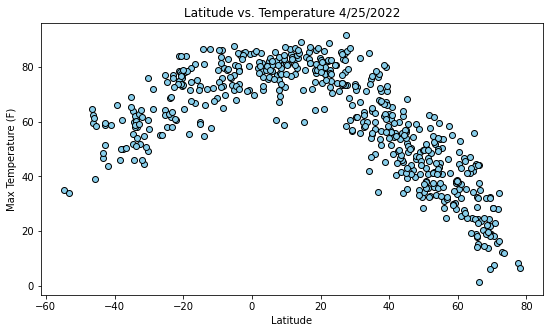

In [10]:
#scatter plot for latitude vs temperature
plt.figure(figsize=(9,5))
plt.scatter(weather_data_df["Latitude"],weather_data_df["Max Temperature"],marker='o', edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Temperature" " ""4/25/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('fig1_2022.png')
plt.show()

## Latitude vs. Humidity Plot

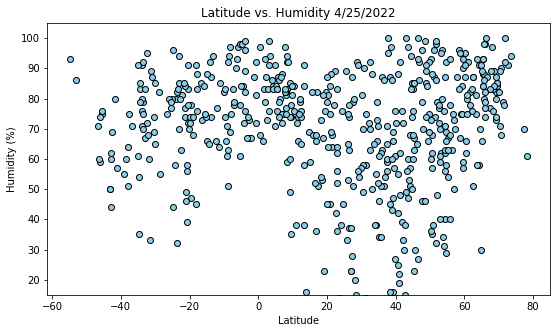

In [11]:
plt.figure(figsize=(9,5))
plt.scatter(weather_data_df["Latitude"],weather_data_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Humidity" " " "4/25/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

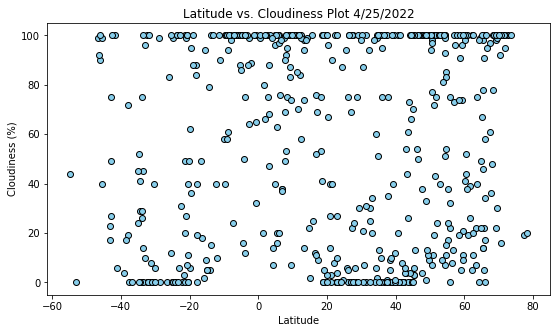

In [12]:
plt.figure(figsize=(9,5))
plt.scatter(weather_data_df["Latitude"],weather_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Cloudiness Plot"" ""4/25/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

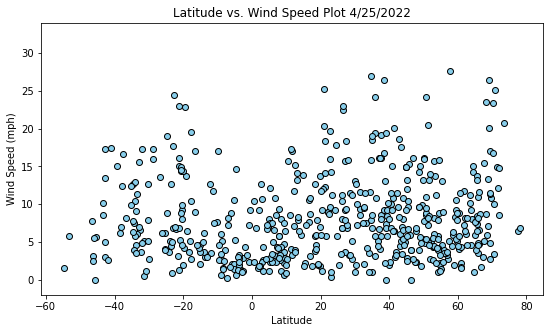

In [13]:
plt.figure(figsize=(9,5))
plt.scatter(weather_data_df["Latitude"],weather_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("Latitude vs. Wind Speed Plot"" ""4/25/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [14]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
north_hemi_df = weather_data_df[weather_data_df['Latitude'] >= 0]

#north_hemi_df.count()

# Create new data frame for southern hemisphere (lat < 0 degree):
south_hemi_df = weather_data_df[weather_data_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.93x + 92.51


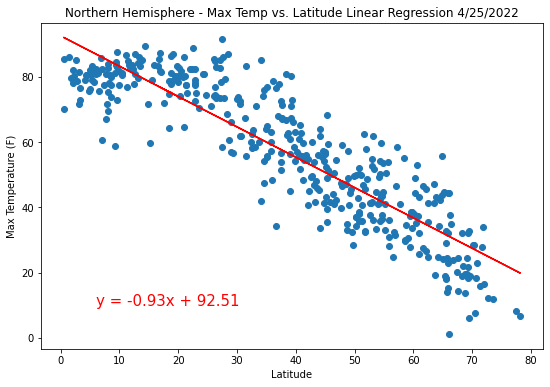

The r-squared is: 0.7933991575631001


In [15]:
#The second requirement is to compute the linear regression for each relationship. 
#plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) 

plt.figure(figsize=(9,6))
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression'" ""4/25/2022")
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.68x + 82.82


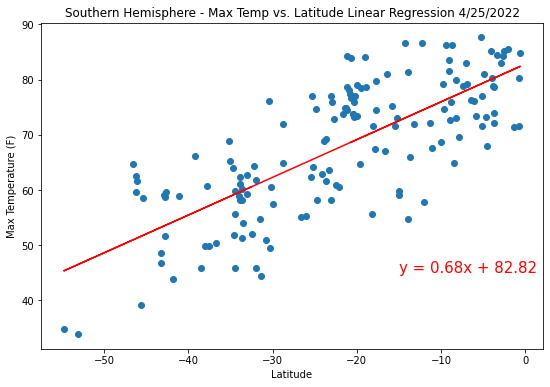

The r-squared is: 0.5686425482017503


In [16]:
#The second requirement is to compute the linear regression for each relationship. 
#plots into Southern Hemisphere (less than 0 degrees latitude) 

plt.figure(figsize=(9,6))
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.13x + 63.32


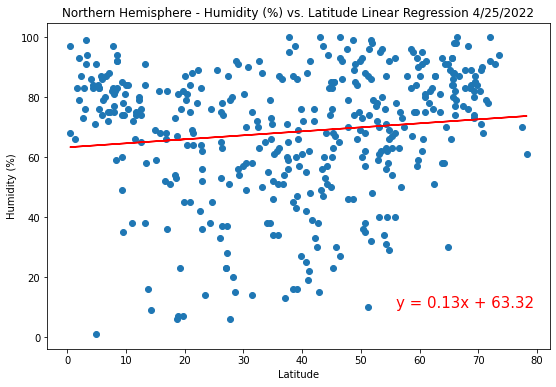

The r-squared is: 0.01579414397766341


In [17]:
#north hemisphere humidity and latitude
plt.figure(figsize=(9,6))
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(56,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.3x + 80.71


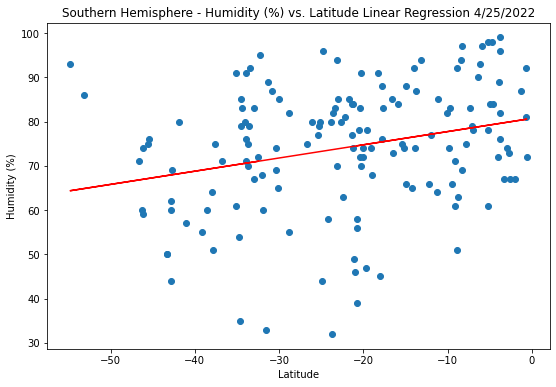

The r-squared is: 0.0747092844668029


In [18]:
#south hemisphere humidity and latitude
plt.figure(figsize=(9,6))
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 56.61


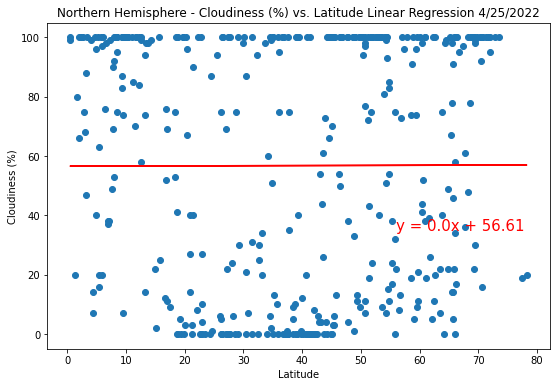

The r-squared is: 5.288630239458925e-06


In [19]:
#north hemisphere cloudiness and latitude
plt.figure(figsize=(9,6))
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(56,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 1.0x + 75.19


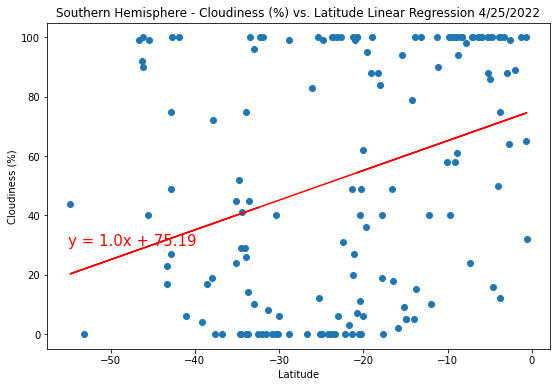

The r-squared is: 0.10353857893889695


In [20]:
#south hemisphere cloudiness and latitude
plt.figure(figsize=(9,6))
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 6.74


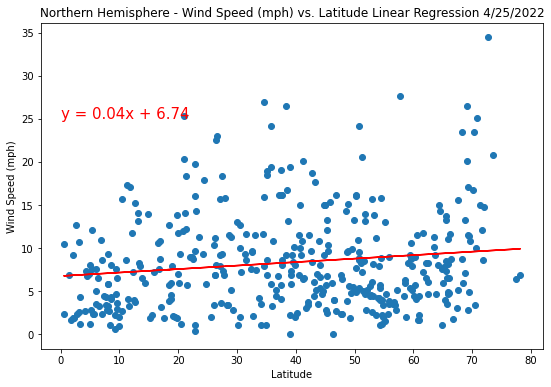

The r-squared is: 0.02117264376097136


In [21]:
#north hemisphere cloudiness and latitude
plt.figure(figsize=(9,6))
x_values = north_hemi_df['Latitude']
y_values = north_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 5.29


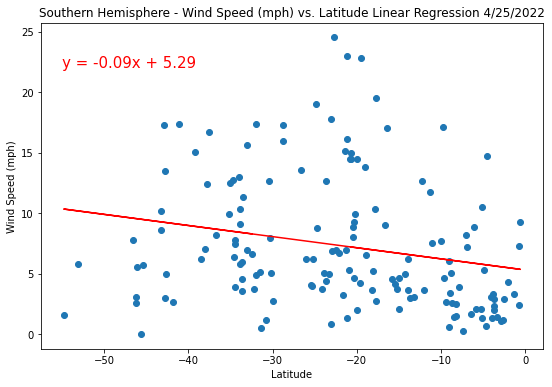

The r-squared is: 0.05055294302247626


In [22]:
#south hemisphere Wind Speed (mph)  and latitude
plt.figure(figsize=(9,6))
x_values = south_hemi_df['Latitude']
y_values = south_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression'" ""4/25/2022")
#******
plt.show()
print(f"The r-squared is: {rvalue**2}")
plt.show()